In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from utils import plot_ds

In [33]:
dataObj = datasets.load_iris()

In [34]:
X = dataObj.data[:,2:4]
y = dataObj.target

In [35]:
X.shape

(150, 2)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [37]:
sc = StandardScaler()

In [38]:
sc.fit(X_train)

StandardScaler()

In [39]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
lr = LogisticRegression(
    solver='lbfgs',
    random_state=0,
    C=1e-4,
    max_iter=1000,
    verbose=2
)

In [41]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.0001, max_iter=1000, random_state=0, verbose=2)

In [42]:
lr.predict(X_train_std)

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2])

In [43]:
accuracy_score(y_train, lr.predict(X_train_std))

0.6666666666666666

In [44]:
accuracy_score(y_test, lr.predict(X_test_std))

0.6666666666666666

In [45]:
lr.coef_

array([[-0.00449229, -0.00434402],
       [ 0.00091293,  0.00051566],
       [ 0.00357936,  0.00382835]])

In [46]:
np.linalg.norm(lr.coef_)

0.008223057953889355

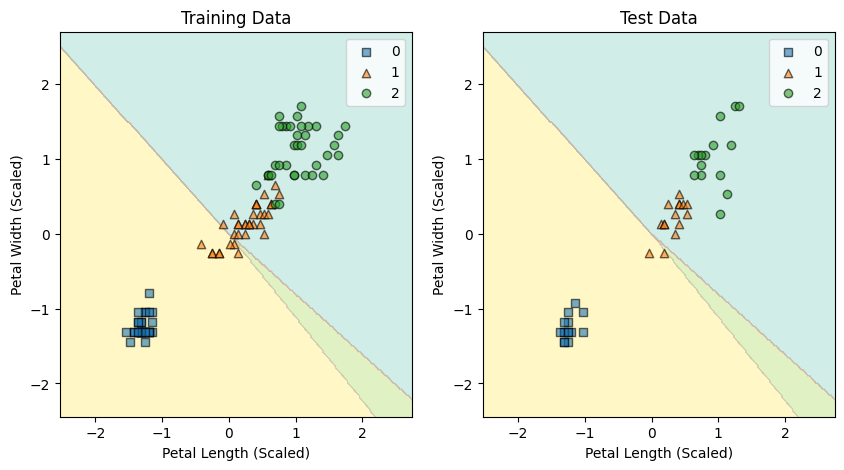

In [47]:
plot_ds(X_train_std, X_test_std, y_train, y_test, lr)

In [55]:
paramSet = {
    "ex1": {"solver": "lbfgs", "C": 0.0001, "max_iter": 100},
    "ex2": {"solver": "lbfgs", "C": 0.01, "max_iter": 100},
    "ex3": {"solver": "lbfgs", "C": 1, "max_iter": 100},
    "ex4": {"solver": "lbfgs", "C": 100, "max_iter": 100},
    "ex5": {"solver": "lbfgs", "C": 10000, "max_iter": 100},
    "ex6": {"solver": "newton-cg", "C": 1, "max_iter": 100},
}

In [62]:
for paramName, paramValue in paramSet.items():
    # print(paramName, paramValue)
    
    lr = LogisticRegression(
        random_state=0,
        solver=paramValue["solver"],
        C=paramValue["C"],
        max_iter=paramValue["max_iter"],
        verbose=0
    )
    
    lr.fit(X_train_std, y_train)
    
    accTrain = accuracy_score(y_train, lr.predict(X_train_std))
    accTest = accuracy_score(y_test, lr.predict(X_test_std))
    
    normW = np.linalg.norm(lr.coef_)
    # print(paramName, accTrain, accTest, paramValue["C"], normW)
    
    print(f"Train Acc: {accTrain:.3f}, Test Acc: {accTest:.3f}, C: {paramValue['C']:.4f}, NormW: {normW:.3f}")
    # plot_ds(X_train_std, X_test_std, y_train, y_test, lr)

Train Acc: 0.667, Test Acc: 0.667, C: 0.0001, NormW: 0.008
Train Acc: 0.838, Test Acc: 0.822, C: 0.0100, NormW: 0.508
Train Acc: 0.952, Test Acc: 0.978, C: 1.0000, NormW: 4.483
Train Acc: 0.943, Test Acc: 0.978, C: 100.0000, NormW: 11.843
Train Acc: 0.943, Test Acc: 1.000, C: 10000.0000, NormW: 17.284
Train Acc: 0.952, Test Acc: 0.978, C: 1.0000, NormW: 4.483
